# **Data Processing of the selected variables**

In this notebook we are going to use the data of the variables selected in the notebook "01_Data_Analysis.ipynb".

With these variables, the process will be as following:

## Process Outline

1. **Scaling variables:**  
    First we need to scale the variables in order to use them for the PCA.

2. **PCA of variables:**  
    To reduce the number of input variables a PCA will be performed.

3. **Creation of time variables:**  
    We will create new time variables to help the predictions such as month, season...

---

This process allows reducing the dimensionality of the dataset and preparing the data for the model.

First step is to read the dataset and clean it to perform the transformation needed.

In [1]:
# Import necessary libraries 
import xarray as xr
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

In [3]:
# Read the dataset
ds = xr.open_dataset("input_data/era5_2021-2025_daymean_merged_gridboxmean5x5_selected.nc")
ds

<xarray.Dataset>
Dimensions:         (time: 1612, lon: 15, lat: 9, lev: 1, depth_2: 1, bnds: 2,
                     depth: 1, depth_2_2: 1, lev_2: 1)
Coordinates:
  * time            (time) datetime64[ns] 2021-01-01T10:30:00 ... 2025-05-31T...
  * lon             (lon) float64 -13.5 -12.25 -11.0 -9.75 ... 0.25 1.5 2.75 4.0
  * lat             (lat) float64 45.5 44.25 43.0 41.75 ... 38.0 36.75 35.5
  * lev             (lev) float64 0.0
  * depth_2         (depth_2) float64 100.0
  * depth           (depth) float64 7.0
  * depth_2_2       (depth_2_2) float64 28.0
  * lev_2           (lev_2) float64 0.0
Dimensions without coordinates: bnds
Data variables: (12/66)
    depth_2_bnds    (depth_2, bnds) float64 ...
    depth_bnds      (depth, bnds) float64 ...
    depth_2_2_bnds  (depth_2_2, bnds) float64 ...
    10v             (time, lat, lon) float32 ...
    2d              (time, lat, lon) float32 ...
    2t              (time, lat, lon) float32 ...
    ...              ...
    vike            (time, lev_2, lat, lon) float32 ...
    ewss            (time, lat, lon) float32 ...
    fsr             (time, lat, lon) float32 ...
    z               (time, lat, lon) float32 ...
    sdfor           (time, lat, lon) float32 ...
    sdor            (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Mon Jun 09 19:04:11 2025: cdo delname,lict,stl2,tsn,swvl4_2...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [4]:
# Eliminate the spatial dimensions except for lon and lat
ds = ds.squeeze(dim=["lev", "depth", "depth_2","depth_2_2","lev_2"], drop=True)
ds = ds.drop_dims("bnds")
# Eliminate some variables that should have been eliminated before
ds = ds.drop_vars(["dl","z","sdfor","sdor"])
ds

<xarray.Dataset>
Dimensions:     (time: 1612, lon: 15, lat: 9)
Coordinates:
  * time        (time) datetime64[ns] 2021-01-01T10:30:00 ... 2025-05-31T09:0...
  * lon         (lon) float64 -13.5 -12.25 -11.0 -9.75 ... 0.25 1.5 2.75 4.0
  * lat         (lat) float64 45.5 44.25 43.0 41.75 40.5 39.25 38.0 36.75 35.5
Data variables: (12/59)
    10v         (time, lat, lon) float32 ...
    2d          (time, lat, lon) float32 ...
    2t          (time, lat, lon) float32 ...
    100v        (time, lat, lon) float32 ...
    v10n        (time, lat, lon) float32 ...
    e           (time, lat, lon) float32 ...
    ...          ...
    vikee       (time, lat, lon) float32 ...
    vimae       (time, lat, lon) float32 ...
    vitoee      (time, lat, lon) float32 ...
    vike        (time, lat, lon) float32 ...
    ewss        (time, lat, lon) float32 ...
    fsr         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Mon Jun 09 19:04:11 2025: cdo delname,lict,stl2,tsn,swvl4_2...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [5]:
# Transform the dataset into a pandas DataFrame
df = ds.to_dataframe().reset_index()
df.head()

,time,lon,lat,10v,2d,2t,100v,v10n,e,fal,...,swvl2,swvl3,vige,vithee,vikee,vimae,vitoee,vike,ewss,fsr
0,2021-01-01 10:30:00,-13.5,45.50,-11.169806,277.752319,282.962738,-12.592723,-11.471601,-0.000265,0.059996,...,0.000001,-0.000007,8.541471e+09,1.622767e+10,40637488.0,70108.453125,2.484326e+10,3570985.5,105.027618,0.000235
1,2021-01-01 10:30:00,-13.5,44.25,-10.977980,278.804993,283.235840,-12.368090,-11.288930,-0.000259,0.059996,...,0.000001,-0.000007,9.645777e+09,2.136497e+10,60043484.0,91536.742188,3.112942e+10,4169877.0,148.118973,0.000229
2,2021-01-01 10:30:00,-13.5,43.00,-10.717303,278.938568,283.718567,-12.055082,-11.028679,-0.000270,0.059996,...,0.000001,-0.000007,1.088475e+10,2.681225e+10,83033808.0,114208.750000,3.786307e+10,4697910.5,172.620239,0.000221
3,2021-01-01 10:30:00,-13.5,41.75,-10.519662,278.997986,284.437653,-11.816493,-10.822524,-0.000284,0.059996,...,0.000001,-0.000007,1.193756e+10,3.148385e+10,95543952.0,133480.562500,4.361718e+10,4803568.0,186.550934,0.000214
4,2021-01-01 10:30:00,-13.5,40.50,-10.224376,279.640381,285.177429,-11.433230,-10.545041,-0.000308,0.059996,...,0.000001,-0.000007,1.242992e+10,3.426429e+10,88387912.0,144633.359375,4.689466e+10,4348638.5,186.219589,0.000206


In [6]:
# First, we need to check if a variable has some NaN on a field.
nan_counts = df.isna().sum()
nan_counts_nonzero = nan_counts[nan_counts != 0]
print(nan_counts_nonzero)

rhoao    67704
wstar    67704
vst      67704
dtype: int64


We can see that there are three variables with the same amount of NaN. If we analyse them we can see that all of them are ocean variables. This means that these NaN values match with the land points. In order to handle it we are going to create a auxiliary variable called "is_ocean". This boolean variable will indicate the model that it is a land point or a sea point.

Also, we will change the nan values with the mean of the variable, in order to not be disruptive and generate bad predictions.

In [7]:
# Define the new variable
df["is_ocean"] = df["rhoao"].isna().astype(int)

# Inpute the mean on the nan values
for var in nan_counts_nonzero.index:
    var_mean = df[var].mean(skipna=True)
    df[var] = df[var].fillna(var_mean)    

In [8]:
# Drop the dimensions variables and the temperature
columns_for_pca = df.columns.drop(["time","lon","lat","2t","is_ocean"])

# Scale the exogenous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[columns_for_pca])
X_scaled_df = pd.DataFrame(
    X_scaled,
    index = df.index,
    columns = columns_for_pca
)

In [9]:
# Now we can perform the PCA with all the exogenous variables
pca_full = PCA(n_components=None, svd_solver="randomized", random_state=0)
pca_full.fit(X_scaled_df)

# Print all the components with their explained variance
cumvar = pca_full.explained_variance_ratio_.cumsum()
for i, v in enumerate(cumvar):
    print(f"PC{i+1}: {v:.3f}")

PC1: 0.220
PC2: 0.388
PC3: 0.531
PC4: 0.637
PC5: 0.717
PC6: 0.769
PC7: 0.810
PC8: 0.844
PC9: 0.871
PC10: 0.889
PC11: 0.903
PC12: 0.915
PC13: 0.926
PC14: 0.935
PC15: 0.943
PC16: 0.950
PC17: 0.957
PC18: 0.963
PC19: 0.969
PC20: 0.974
PC21: 0.978
PC22: 0.981
PC23: 0.984
PC24: 0.986
PC25: 0.988
PC26: 0.991
PC27: 0.992
PC28: 0.994
PC29: 0.995
PC30: 0.997
PC31: 0.998
PC32: 0.998
PC33: 0.999
PC34: 0.999
PC35: 0.999
PC36: 1.000
PC37: 1.000
PC38: 1.000
PC39: 1.000
PC40: 1.000
PC41: 1.000
PC42: 1.000
PC43: 1.000
PC44: 1.000
PC45: 1.000
PC46: 1.000
PC47: 1.000
PC48: 1.000
PC49: 1.000
PC50: 1.000
PC51: 1.000
PC52: 1.000
PC53: 1.000
PC54: 1.000
PC55: 1.000
PC56: 1.000
PC57: 1.000
PC58: 1.000


We can see that with 12 components is enought to reach 90% of explained variance. We will use these 12 variables to include in the model.

In [10]:
# Get the 11 PC and make a dataframe with them
n_PCs = 11
pca = PCA(n_components=n_PCs, svd_solver="randomized", random_state=0)
X_pca = pca.fit_transform(X_scaled_df)
df_pca = pd.DataFrame(X_pca, index=df.index, columns=[f"PC{i+1}" for i in range(n_PCs)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-9.925297,-2.939849,3.810723,2.731544,-1.968463,0.095340,-1.144731,0.771093,-0.569116,-0.829280,1.334716
1,-9.656973,-2.990032,4.060369,3.156939,-1.513813,-0.038607,-1.312081,1.035010,-0.551091,-1.061688,1.283489
2,-9.432762,-3.218585,4.471893,3.677577,-1.331893,0.011227,-1.400851,1.030671,-0.428557,-1.276261,1.081951
3,-9.185103,-3.462456,4.714110,4.043790,-1.360848,0.143835,-1.367717,0.895554,-0.376147,-1.352525,0.820747
4,-9.012034,-3.752029,4.474129,4.585391,-1.772688,0.445635,-1.131390,0.693058,-0.265440,-1.246374,0.566533
...,...,...,...,...,...,...,...,...,...,...,...
217615,1.828920,-2.198652,-2.129220,-2.570748,1.306525,-0.843543,0.102927,1.298649,1.101203,0.752756,-0.927564
217616,0.662010,-2.071213,-2.090013,-2.528902,0.446575,-0.781934,0.186388,1.388186,1.035362,0.987305,-0.690408
217617,-0.337296,-2.328507,-2.055064,-2.511862,0.066237,-0.463834,0.075361,1.136098,0.624150,1.055413,-0.727493
217618,-0.973890,1.085195,-3.459301,0.298056,-0.172333,0.044129,-0.649008,0.574596,0.858063,0.484987,-1.088185


In [11]:
# Concat the dataframe with the dimensions and temperature and the PCs
df_processed = df.copy()
df_processed = df_processed.drop(columns=columns_for_pca)
df_processed = pd.concat([df_processed, df_pca], axis = 1)

df_processed.head()

,time,lon,lat,2t,is_ocean,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,2021-01-01 10:30:00,-13.5,45.50,282.962738,0,-9.925297,-2.939849,3.810723,2.731544,-1.968463,0.095340,-1.144731,0.771093,-0.569116,-0.829280,1.334716
1,2021-01-01 10:30:00,-13.5,44.25,283.235840,0,-9.656973,-2.990032,4.060369,3.156939,-1.513813,-0.038607,-1.312081,1.035010,-0.551091,-1.061688,1.283489
2,2021-01-01 10:30:00,-13.5,43.00,283.718567,0,-9.432762,-3.218585,4.471893,3.677577,-1.331893,0.011227,-1.400851,1.030671,-0.428557,-1.276261,1.081951
3,2021-01-01 10:30:00,-13.5,41.75,284.437653,0,-9.185103,-3.462456,4.714110,4.043790,-1.360848,0.143835,-1.367717,0.895554,-0.376147,-1.352525,0.820747
4,2021-01-01 10:30:00,-13.5,40.50,285.177429,0,-9.012034,-3.752029,4.474129,4.585391,-1.772688,0.445635,-1.131390,0.693058,-0.265440,-1.246374,0.566533


Now that we have all the exogenous variables, we are going to create some helpfull time variables.

In [12]:
# First we need to create a location id in order to group all the series on the model
locations = df_processed[["lat","lon"]].drop_duplicates().reset_index(drop=True)
locations["location_id"] = range(len(locations))

df_grouped = df_processed.merge(locations, on=["lat","lon"], how="left")

# Change the time to a pandas datetime format
df_grouped["time"] = pd.to_datetime(df_grouped["time"], format="%Y-%m-%d")
df_grouped = df_grouped.sort_values(["location_id", "time"]).reset_index(drop=True)

# Transform the temperature variable form Kelvins to Celsius
df_grouped["2t"] = df_grouped["2t"] - 273.15

# Create a time index to include it on the TFT model
df_grouped["time_idx"] = df_grouped.groupby("location_id").cumcount()+1
max_idx = df_grouped["time_idx"].max()

# Normalize the time index so we can use it on the model as a variable that indicates the time evolution but dont include a bias
df_grouped["time_idx_norm"] = df_grouped["time_idx"] / max_idx

# Ge the year, month and day of the year
df_grouped["year"] = df_grouped["time"].dt.year
df_grouped["month"] = df_grouped["time"].dt.month
df_grouped["dayofyear"] = df_grouped["time"].dt.dayofyear

# Create a season variable
def season_by_dayofyear(dayofyear):
    if 80 <= dayofyear < 172:    # ~21 Mar – 20 Jun
        return "spring"
    elif 172 <= dayofyear < 265: # ~21 Jun – 22 Sep
        return "summer"
    elif 265 <= dayofyear < 355: # ~23 Sep – 20 Dic
        return "autumn"
    else:
        return "winter"
df_grouped["season"] = df_grouped["dayofyear"].apply(season_by_dayofyear)

# The day of the year and the month are cyclic variables, so in order to teach the model the continuity from day 365 with day 1 and month 12 with month 1 we
# are going to use a sine/cosine structure for the variables.
df_grouped["dayofyear_sin"] = np.sin(2 * np.pi * df_grouped["dayofyear"] / 365)
df_grouped["dayofyear_cos"] = np.cos(2 * np.pi * df_grouped["dayofyear"] / 365)
df_grouped["month_sin"] = np.sin(2 * np.pi * df_grouped["month"] / 12)
df_grouped["month_cos"] = np.cos(2 * np.pi * df_grouped["month"] / 12)

# We are going to scale the lon, lat and year variable to dont introduce bias
scaler = StandardScaler()
df_grouped[["lat", "lon", "year"]] = scaler.fit_transform(df_grouped[["lat", "lon", "year"]])

# As the is ocean variable is a categorical, to use it in the model we need to set string on their values.
df_grouped["is_ocean"] = df_grouped['is_ocean'].map({0: 'land', 1: 'ocean'})
# Same for location, we are going to transform into string format
df_grouped["location_id"] = df_grouped["location_id"].astype(str)

df_grouped

,time,lon,lat,2t,is_ocean,PC1,PC2,PC3,PC4,PC5,...,time_idx,time_idx_norm,year,month,dayofyear,season,dayofyear_sin,dayofyear_cos,month_sin,month_cos
0,2021-01-01 10:30:00,-1.620185,1.549193,9.812744,land,-9.925297,-2.939849,3.810723,2.731544,-1.968463,...,1,0.000620,-1.345207,1,1,winter,0.017213,0.999852,0.5,0.866025
1,2021-01-02 10:30:00,-1.620185,1.549193,9.984833,land,-7.729809,-2.126436,2.666323,0.301923,-2.434395,...,2,0.001241,-1.345207,1,2,winter,0.034422,0.999407,0.5,0.866025
2,2021-01-03 10:30:00,-1.620185,1.549193,9.910126,land,-7.106028,-2.245741,2.082893,0.181186,-1.565016,...,3,0.001861,-1.345207,1,3,winter,0.051620,0.998667,0.5,0.866025
3,2021-01-04 10:30:00,-1.620185,1.549193,9.302338,land,-8.749384,-2.314526,3.184947,1.582789,-3.268901,...,4,0.002481,-1.345207,1,4,winter,0.068802,0.997630,0.5,0.866025
4,2021-01-05 10:30:00,-1.620185,1.549193,9.226074,land,-7.046088,-1.730096,1.287613,-0.004367,-3.620189,...,5,0.003102,-1.345207,1,5,winter,0.085965,0.996298,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217615,2025-05-27 10:30:00,1.620185,-1.549193,24.534454,ocean,-2.147847,5.258300,-3.148259,2.123637,-0.831757,...,1608,0.997519,1.755936,5,147,spring,0.573772,-0.819015,0.5,-0.866025
217616,2025-05-28 10:30:00,1.620185,-1.549193,25.170563,ocean,-3.457126,5.307985,-4.088414,2.621800,0.362598,...,1609,0.998139,1.755936,5,148,spring,0.559589,-0.828770,0.5,-0.866025
217617,2025-05-29 10:30:00,1.620185,-1.549193,24.512360,ocean,-3.860420,6.057542,-3.464025,2.088844,-0.882357,...,1610,0.998759,1.755936,5,149,spring,0.545240,-0.838280,0.5,-0.866025
217618,2025-05-30 10:30:00,1.620185,-1.549193,25.730042,ocean,-3.046288,5.534227,-4.172999,2.343347,-0.422551,...,1611,0.999380,1.755936,5,150,spring,0.530730,-0.847541,0.5,-0.866025


In [ ]:
# Now we can save the dataframe into a csv to work on next notebook
df_grouped.to_csv("tft_ready_dataframe.csv",
                sep=",",
                index=False,
                float_format="%.16f",       
                encoding="utf-8",
                date_format="%Y-%m-%d")

In order to not lose interpretability, we are going to get the components of each PC.

In [13]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose to get a PC for each column
    columns=[f"PC{i+1}" for i in range(n_PCs)],
    index=columns_for_pca
)

loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
10v,0.217002,0.097418,0.042109,-0.030930,-0.071581,-0.091934,0.104571,0.020139,0.341026,-0.017601,-0.072623
2d,0.116380,-0.201464,-0.166636,0.069049,0.111684,0.038134,-0.016742,0.031701,0.012220,0.011765,-0.066981
100v,0.223821,0.087036,0.043752,-0.032793,-0.098144,-0.072342,0.075900,0.025377,0.323422,-0.012582,-0.049768
v10n,0.215855,0.099472,0.040531,-0.031618,-0.068964,-0.093386,0.106313,0.017882,0.342893,-0.018535,-0.074206
e,0.118613,0.160140,-0.063486,-0.196104,0.180266,-0.152817,-0.022232,0.146132,-0.129193,-0.013330,0.072310


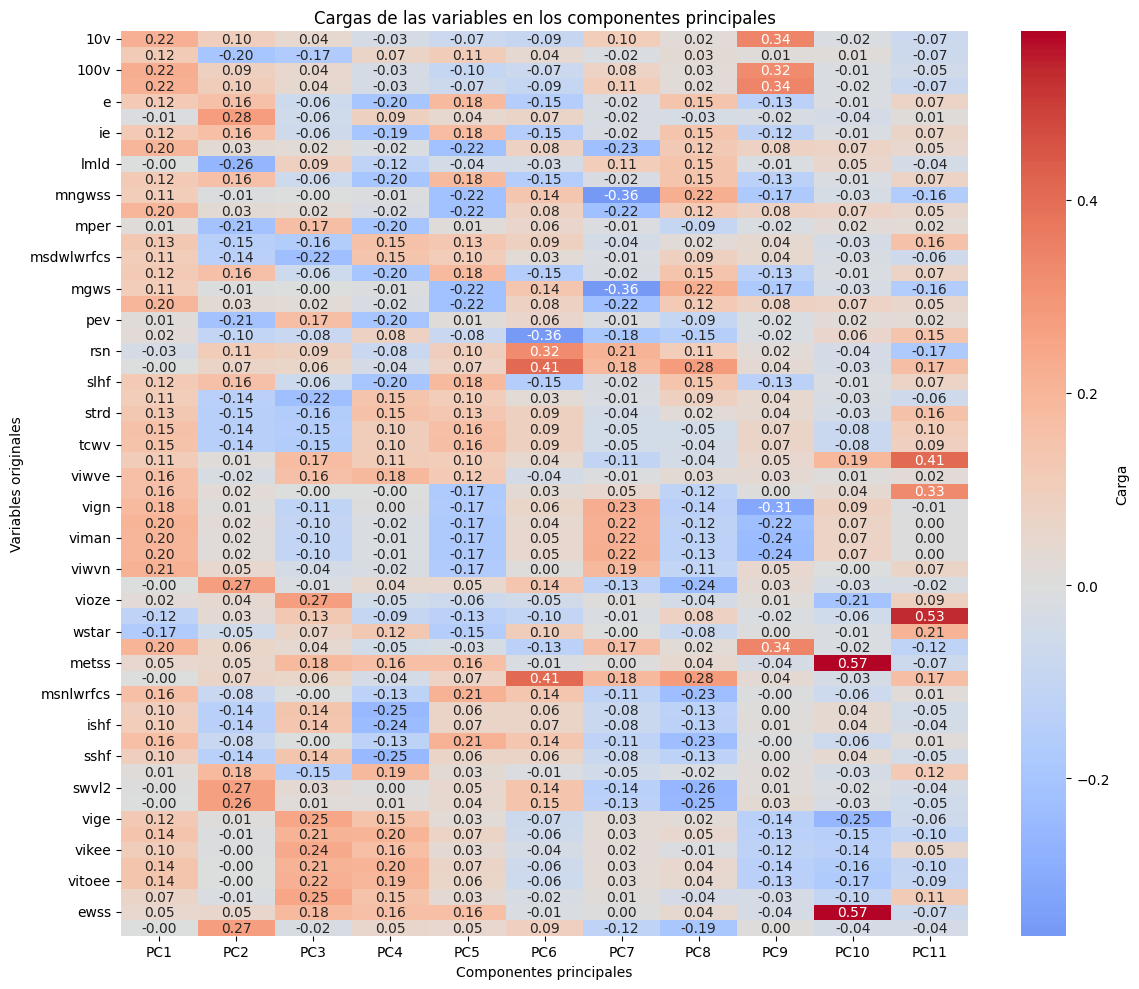

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(loadings, cmap="coolwarm", center=0, annot=True, fmt=".2f", cbar_kws={"label": "Carga"})
plt.title("Cargas de las variables en los componentes principales")
plt.xlabel("Componentes principales")
plt.ylabel("Variables originales")
plt.tight_layout()
plt.show()

Now we calculate the relative loading, normalized for each column to see them in terms of percentages.

In [14]:
relative_loadings = loadings.abs().div(loadings.abs().sum(axis=0), axis=1) * 100
relative_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
10v,3.368660,1.651610,0.676968,0.497905,1.076451,1.610224,1.893512,0.323364,6.634626,0.409753,1.353163
2d,1.806635,3.415609,2.678941,1.111532,1.679525,0.667927,0.303148,0.509003,0.237729,0.273889,1.248046
100v,3.474517,1.475594,0.703382,0.527895,1.475910,1.267072,1.374346,0.407465,6.292150,0.292914,0.927316
v10n,3.350851,1.686437,0.651594,0.508978,1.037102,1.635664,1.925050,0.287125,6.670959,0.431504,1.382656
e,1.841300,2.715001,1.020644,3.156813,2.710883,2.676605,0.402556,2.346382,2.513440,0.310315,1.347331


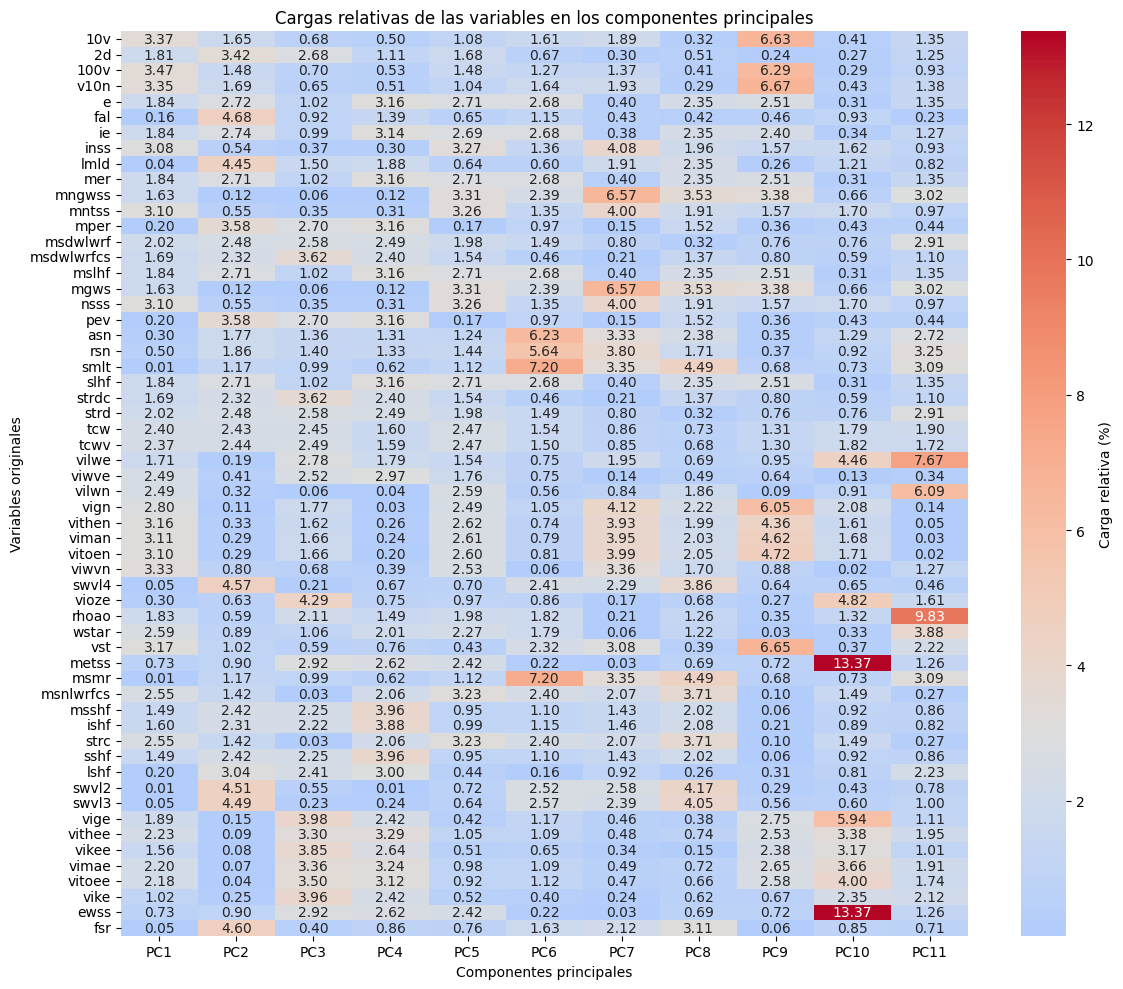

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(relative_loadings, cmap="coolwarm", center=3, annot=True, fmt=".2f", cbar_kws={"label": "Carga relativa (%)"})
plt.title("Cargas relativas de las variables en los componentes principales")
plt.xlabel("Componentes principales")
plt.ylabel("Variables originales")
plt.yticks([i+0.5 for i in range(len(relative_loadings.axes[0]))],relative_loadings.axes[0])
plt.tight_layout()
plt.show()